In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\hyunw\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from datetime import datetime
import math
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [3]:
df_data = pd.concat([pd.read_csv('dbmetrics_20221127_1.csv'), pd.read_csv('dbmetrics_20221127_2.csv')], ignore_index=True)

In [4]:
df_data.columns = ['TIME'
                   , 'SQL1', 'SQL2', 'SQL3'
                   , 'TPS1', 'TPS2', 'TPS3'
                   , 'USER1', 'USER2', 'USER3'
                   , 'CALL1', 'CALL2', 'CALL3'
                   
                   , 'CPU1', 'CPU2', 'CPU3'
                   , 'HEAP1', 'HEAP2', 'HEAP3'
                  ]

In [5]:
df_data

,TIME,SQL1,SQL2,SQL3,TPS1,TPS2,TPS3,USER1,USER2,USER3,CALL1,CALL2,CALL3,CPU1,CPU2,CPU3,HEAP1,HEAP2,HEAP3
0,8/1/2022 00:00,54,172,47,0.26,0.26,0.20,5.96,10.73,7.84,16,16,12,0.16,0.26,0.63,75.40,61.17,41.72
1,8/1/2022 00:01,71,47,66,0.23,0.15,0.16,1.95,2.88,3.11,14,9,10,0.14,0.17,0.48,77.73,63.55,44.00
2,8/1/2022 00:02,18,23,23,0.13,0.10,0.16,2.70,7.22,2.28,8,6,10,0.13,0.13,0.57,80.11,65.23,46.72
3,8/1/2022 00:03,66,40,64,0.25,0.21,0.18,4.09,5.30,5.05,15,13,11,0.18,0.20,0.57,65.49,48.93,49.33
4,8/1/2022 00:04,27,60,16,0.06,0.15,0.10,1.58,5.36,1.84,4,9,6,0.12,0.18,0.46,56.27,41.16,51.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43193,8/30/2022 23:54,2068,2044,1994,2.96,3.04,2.88,60.01,56.45,63.30,178,183,173,1.33,1.46,2.73,38.64,41.37,36.14
43194,8/30/2022 23:55,2098,2156,2008,3.01,3.03,2.98,51.13,64.72,53.88,181,182,179,1.21,1.70,2.93,39.78,43.14,34.60
43195,8/30/2022 23:56,1928,1859,1747,2.83,2.56,2.58,64.26,52.01,47.36,170,154,155,1.25,1.42,2.67,43.62,42.63,36.59
43196,8/30/2022 23:57,1817,1679,1693,2.53,2.40,2.48,42.01,45.40,53.32,152,144,149,1.12,1.17,2.25,40.31,36.80,41.60


In [6]:
df_data.head()

,TIME,SQL1,SQL2,SQL3,TPS1,TPS2,TPS3,USER1,USER2,USER3,CALL1,CALL2,CALL3,CPU1,CPU2,CPU3,HEAP1,HEAP2,HEAP3
0,8/1/2022 00:00,54,172,47,0.26,0.26,0.20,5.96,10.73,7.84,16,16,12,0.16,0.26,0.63,75.40,61.17,41.72
1,8/1/2022 00:01,71,47,66,0.23,0.15,0.16,1.95,2.88,3.11,14,9,10,0.14,0.17,0.48,77.73,63.55,44.00
2,8/1/2022 00:02,18,23,23,0.13,0.10,0.16,2.70,7.22,2.28,8,6,10,0.13,0.13,0.57,80.11,65.23,46.72
3,8/1/2022 00:03,66,40,64,0.25,0.21,0.18,4.09,5.30,5.05,15,13,11,0.18,0.20,0.57,65.49,48.93,49.33
4,8/1/2022 00:04,27,60,16,0.06,0.15,0.10,1.58,5.36,1.84,4,9,6,0.12,0.18,0.46,56.27,41.16,51.26


In [7]:
df_data.describe()

,SQL1,SQL2,SQL3,TPS1,TPS2,TPS3,USER1,USER2,USER3,CALL1,CALL2,CALL3,CPU1,CPU2,CPU3,HEAP1,HEAP2,HEAP3
count,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000
mean,1920.587921,1913.398653,1804.676629,3.120220,3.111339,2.945850,81.379100,81.368477,79.981805,187.476596,186.944650,177.015001,1.296929,1.606094,3.053160,34.143190,32.407900,32.008046
std,2389.766221,2366.165886,2223.844624,3.452993,3.421149,3.222234,79.190209,79.090688,77.698529,207.193975,205.282149,193.348668,1.408443,1.734730,3.031392,18.008965,16.605233,16.093277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,123.000000,120.000000,0.360000,0.380000,0.360000,14.030000,14.120000,13.960000,22.000000,23.000000,22.000000,0.240000,0.280000,0.740000,20.770000,20.430000,20.430000
50%,819.000000,833.000000,792.500000,1.580000,1.580000,1.540000,59.645000,59.645000,58.795000,95.000000,95.000000,93.000000,0.800000,0.930000,1.930000,29.040000,28.390000,28.290000
75%,3131.000000,3112.000000,2914.000000,4.760000,4.780000,4.500000,127.000000,127.000000,125.000000,286.000000,287.000000,270.000000,1.970000,2.440000,4.550000,45.190000,41.487500,40.060000
max,16379.000000,15818.000000,14965.000000,22.850000,23.410000,21.290000,452.000000,456.000000,451.000000,1371.000000,1405.000000,1278.000000,70.460000,29.560000,73.960000,92.600000,94.440000,90.500000


In [8]:
df_data['T'] = pd.to_datetime(df_data['TIME'], format='%m/%d/%Y %H:%M', errors='raise')
df_data['T'] = df_data['T'].apply(lambda x: int(datetime.strftime(x, '%H%M')))

In [9]:
df_data['USER'] = df_data['USER1'] + df_data['USER2'] + df_data['USER3']
df_data['CALL'] = df_data['CALL1'] + df_data['CALL2'] + df_data['CALL3']
df_data['SQL'] = df_data['SQL1'] + df_data['SQL2'] + df_data['SQL3']
df_data['TPS'] = df_data['TPS1'] + df_data['TPS2'] + df_data['TPS3']
df_data['CPU'] = df_data['CPU1'] + df_data['CPU2'] + df_data['CPU3']
df_data['HEAP'] = df_data['HEAP1'] + df_data['HEAP2'] + df_data['HEAP3']

In [10]:
df_analysis = df_data[['T', 'USER', 'CALL', 'SQL', 'TPS', 'CPU', 'HEAP']]

In [11]:
df_analysis.describe()

,T,USER,CALL,SQL,TPS,CPU,HEAP
count,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000
mean,1179.445391,242.729382,551.436247,5638.663202,9.177409,5.956183,98.559136
std,692.412786,235.056352,605.040709,6965.994509,10.083305,6.099962,46.008702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,569.250000,42.470000,68.000000,365.000000,1.120000,1.270000,62.682500
50%,1159.000000,178.050000,283.000000,2431.500000,4.700000,3.670000,81.820000
75%,1759.000000,379.000000,840.000000,9152.000000,13.990000,9.000000,132.757500
max,2359.000000,1333.000000,4054.000000,46996.000000,67.550000,144.420000,233.400000


In [12]:
def correct_was_count(rows):
    uc = math.ceil(rows['USER'] / 200)
    cc = math.ceil(rows['CALL'] / 1000)
    sc = math.ceil(rows['SQL'] / 10000)
    tc = math.ceil(rows['TPS'] / 20)     
    return max(uc, cc, sc, tc) + 1

In [13]:
df_analysis['WAS'] = df_analysis.apply(lambda x: correct_was_count(x) ,axis=1)

C:\Users\hyunw\AppData\Local\Temp\ipykernel_76552\1417444051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['WAS'] = df_analysis.apply(lambda x: correct_was_count(x) ,axis=1)


In [14]:
df_analysis.sort_values('WAS', ascending=False).head()

,T,USER,CALL,SQL,TPS,CPU,HEAP,WAS
23910,1431,1227.0,3509,37946,58.48,37.49,57.70,8
23930,1451,1204.0,3041,34173,50.66,32.62,61.22,8
23928,1449,1221.0,3206,35662,53.43,32.80,60.84,8
33138,19,1206.0,3400,42372,56.66,90.98,53.81,8
23927,1448,1226.0,3232,36401,53.84,33.78,60.87,8


<Figure size 1100x1100 with 0 Axes>

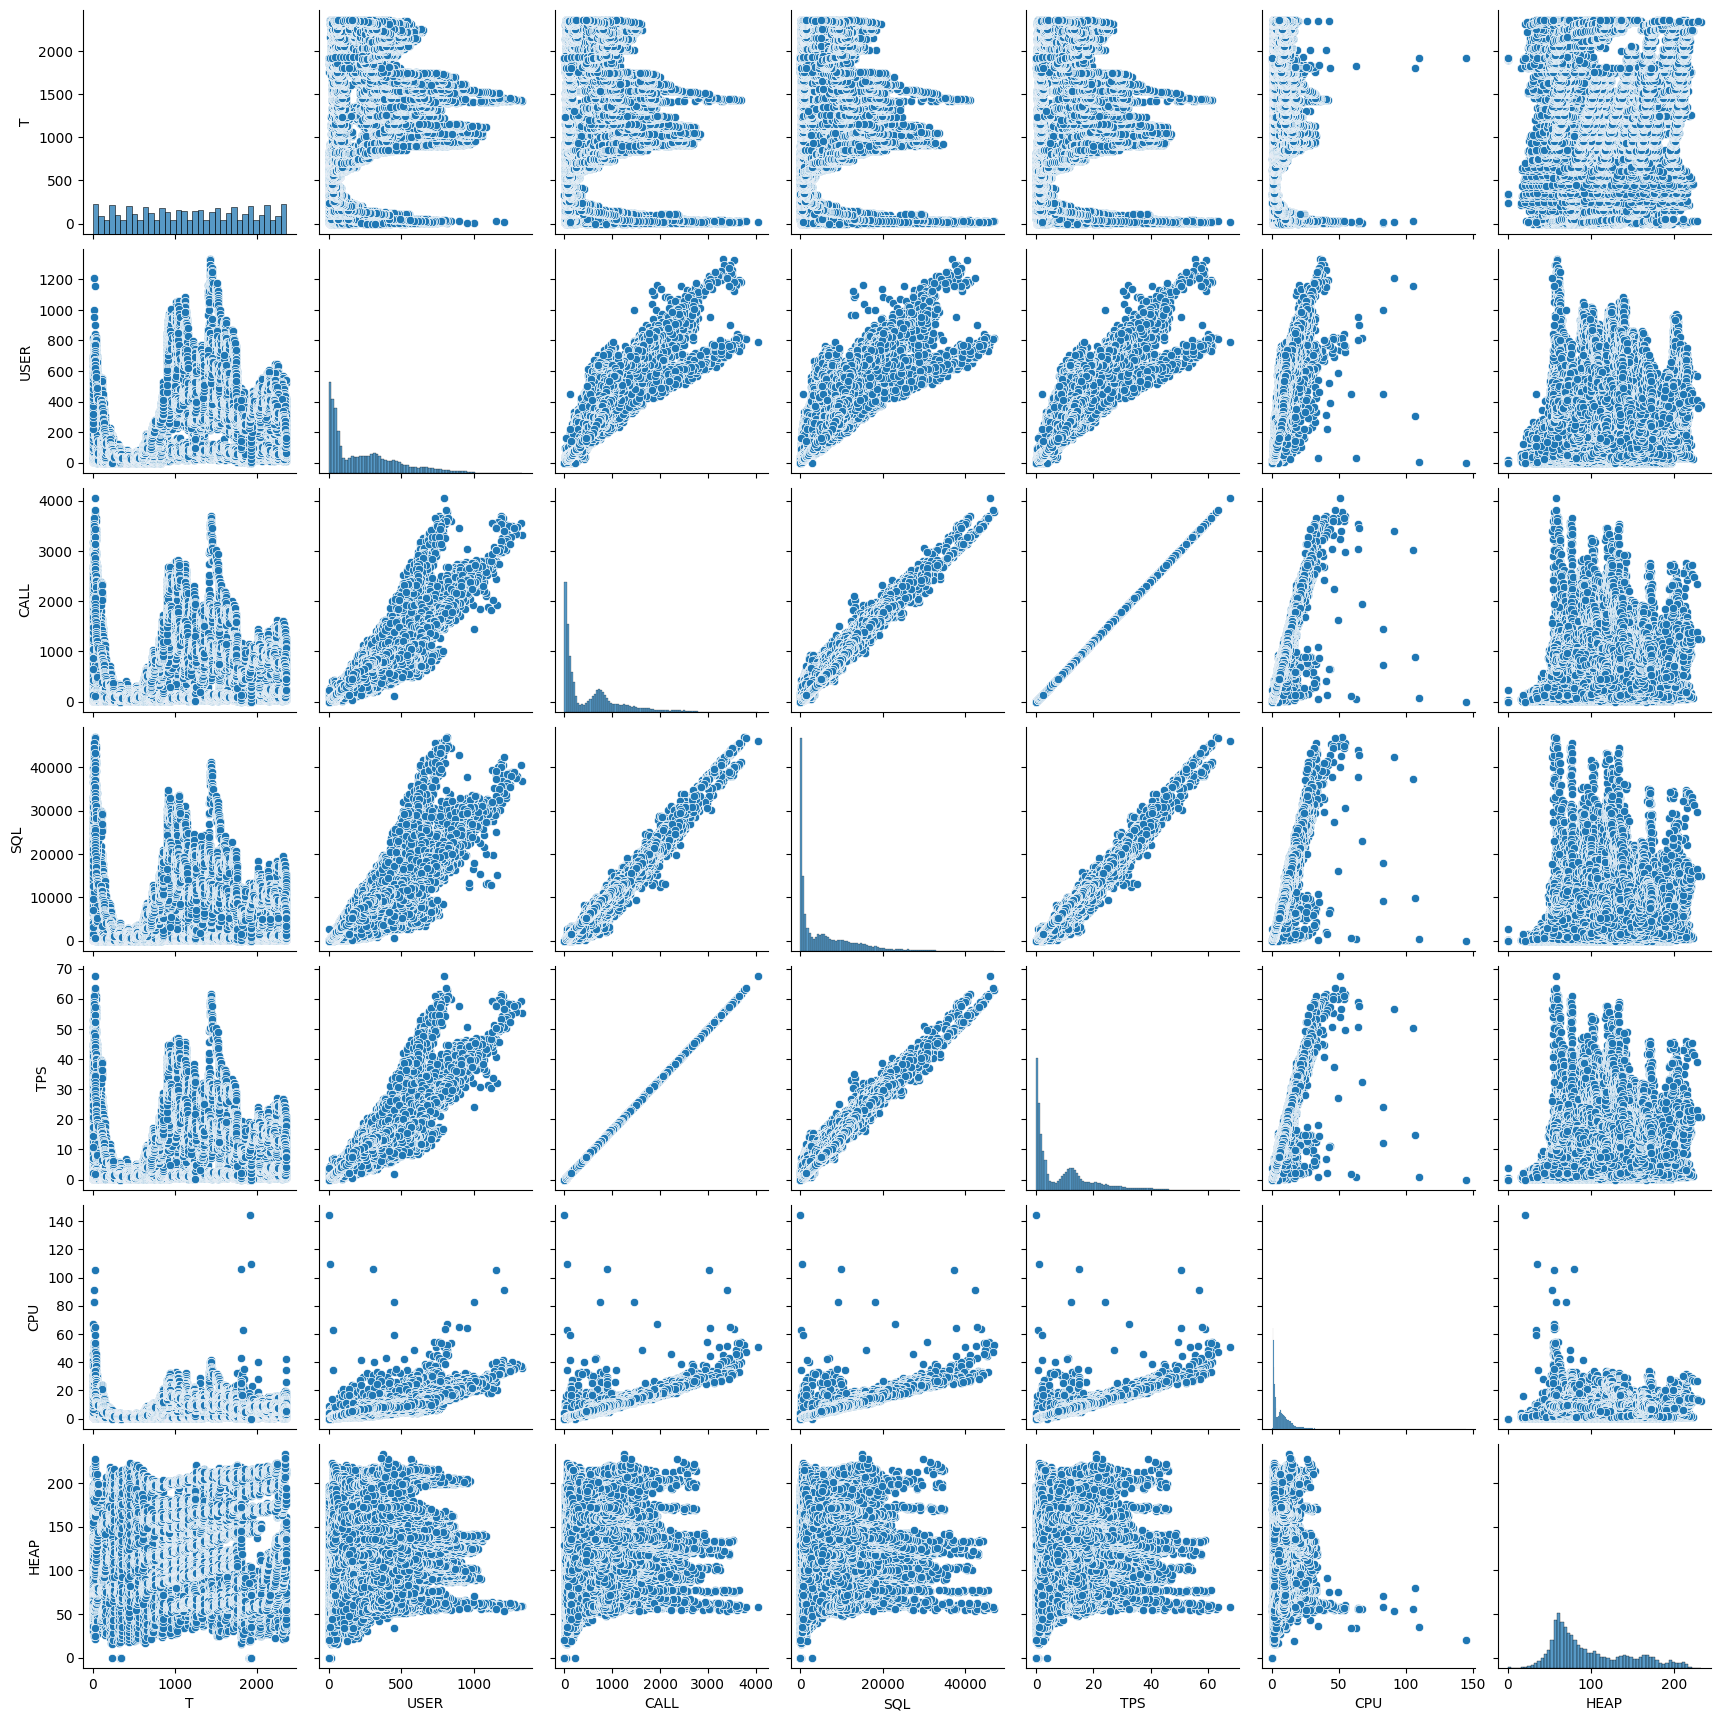

In [15]:
# Pairplot
plt.figure(figsize=(11,11))
sns.pairplot(df_analysis.drop(columns = ['WAS']))

In [16]:
corr = df_analysis.drop(columns = ['WAS']).corr()
corr

,T,USER,CALL,SQL,TPS,CPU,HEAP
T,1.000000,0.244603,0.147464,0.102081,0.147410,0.142924,-0.112683
USER,0.244603,1.000000,0.931751,0.877107,0.931739,0.873361,0.232023
CALL,0.147464,0.931751,1.000000,0.981810,1.000000,0.949383,0.327589
SQL,0.102081,0.877107,0.981810,1.000000,0.981814,0.946386,0.349445
TPS,0.147410,0.931739,1.000000,0.981814,1.000000,0.949383,0.327580
CPU,0.142924,0.873361,0.949383,0.946386,0.949383,1.000000,0.291824
HEAP,-0.112683,0.232023,0.327589,0.349445,0.327580,0.291824,1.000000


<AxesSubplot: >

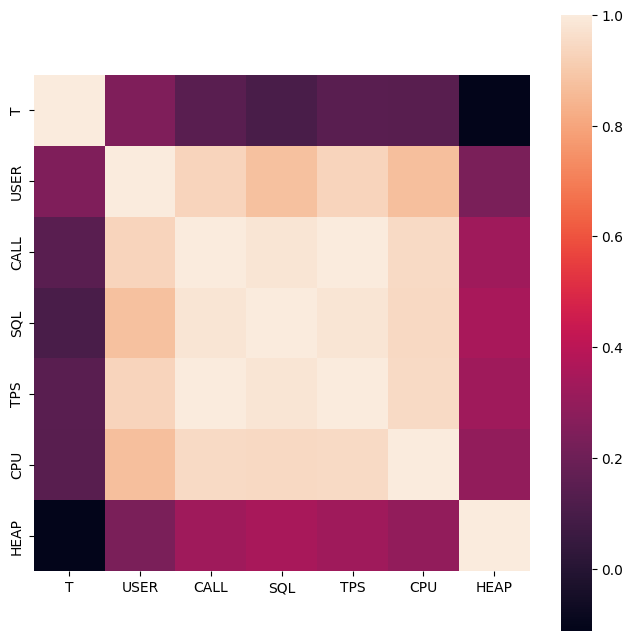

In [17]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, square = True)

In [18]:
data_X = df_analysis.loc[:, ['T', 'USER', 'SQL', 'CALL', 'TPS', 'CPU', 'HEAP']]
data_y = df_analysis['WAS']

In [19]:
X = df_analysis[['SQL', 'TPS', 'CPU']]
y = df_analysis['WAS']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
                                                    test_size=0.3, random_state=42, shuffle=True)

<Figure size 1100x1100 with 0 Axes>

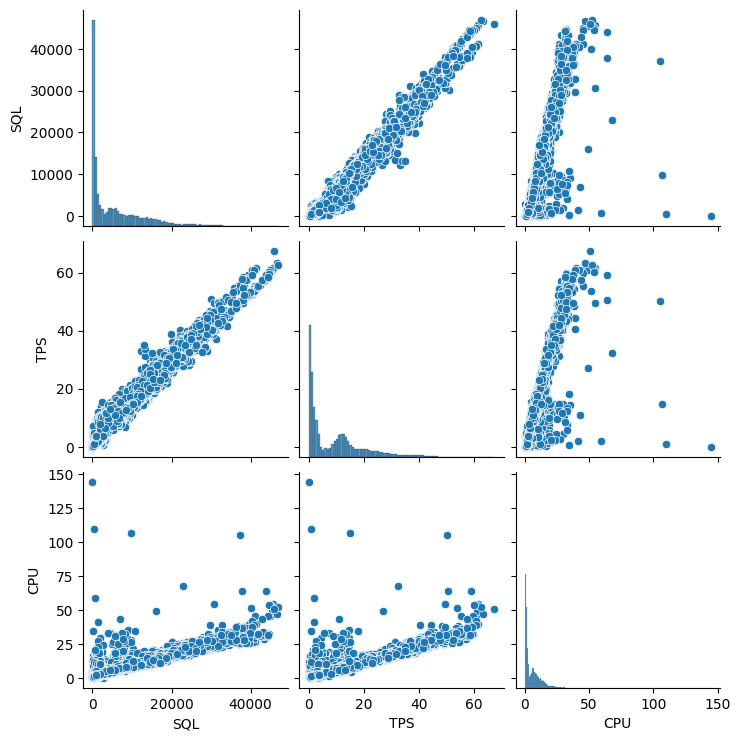

In [21]:
# Pairplot
plt.figure(figsize=(11,11))
sns.pairplot(X_train)

In [22]:
modelt = sm.OLS(y_train, X_train).fit()
predictions = modelt.predict(X) 
modelt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    WAS   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.819
Method:                 Least Squares   F-statistic:                          4.569e+04
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                        0.00
Time:                        22:02:29   Log-Likelihood:                         -50722.
No. Observations:               30238   AIC:                                  1.014e+05
Df Residuals:                   30235   BIC:                                  1.015e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SQL           -0.0005   5.42e-06    -88.653      0.000      -0.000      -0.000
TPS            0.3833      0.004     96.929      0.000       0.376       0.391
CPU            0.2012      0.004     53.999      0.000       0.194       0.208
==============================================================================
Omnibus:                    22168.942   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2129374.103
Skew:                          -2.798   Prob(JB):                         0.00
Kurtosis:                      43.728   Cond. No.                     5.61e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

LinearRegression

In [23]:
ridge_model = Ridge(alpha=20).fit(X_train, y_train)
print('R2 score is ', ridge_model.score(X_valid, y_valid))
print('model coefficients:\n', ridge_model.coef_, '\nintercept: ',ridge_model.intercept_)
RMSE = mean_squared_error(y_train, ridge_model.predict(X_train), squared =False)
print('the root mean square error is ', RMSE)

R2 score is  0.8671671887566276
model coefficients:
 [-1.35075720e-04  1.92002937e-01 -1.50400957e-03] 
intercept:  1.843846977715975
the root mean square error is  0.39929254880580045


In [24]:
lasso_model = Lasso().fit(X_train, y_train)
print('R2 score is ', lasso_model.score(X_valid, y_valid))
print('model coefficients:\n', lasso_model.coef_, '\nintercept: ',lasso_model.intercept_)
RMSE = mean_squared_error(y_train, lasso_model.predict(X_train), squared =False)
print('the root mean square error is ', RMSE)

R2 score is  0.7527886042142271
model coefficients:
 [0.00013695 0.         0.        ] 
intercept:  2.06409511038809
the root mean square error is  0.5417282231225958


In [25]:
lin_model = LinearRegression().fit(X_train, y_train)
print('R2 score is ', lin_model.score(X_valid, y_valid))
print('model coefficients:\n', lin_model.coef_, '\nintercept: ',lin_model.intercept_)
RMSE = mean_squared_error(y_train, lin_model.predict(X_train), squared =False)
print('the root mean square error is ', RMSE)

R2 score is  0.8671663211959801
model coefficients:
 [-1.35120973e-04  1.92041900e-01 -1.51631772e-03] 
intercept:  1.8438177102456925
the root mean square error is  0.3992925425945329


In [26]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly_train = poly_features.fit_transform(X_train)
x_poly_valid = poly_features.fit_transform(X_valid)
poly_model = LinearRegression().fit(x_poly_train, y_train)
print('R2 score is ', poly_model.score(x_poly_valid, y_valid))
print('model coefficients:\n', poly_model.coef_, '\nintercept: ',poly_model.intercept_)
RMSE = mean_squared_error(y_train, poly_model.predict(x_poly_train), squared =False)
print('the root mean square error is ', RMSE)

R2 score is  0.8762274786669707
model coefficients:
 [-1.75666671e-04  2.24431691e-01 -1.97834211e-03 -2.80820747e-08
  3.67670738e-05 -9.42003407e-07 -1.19002193e-02  3.70717370e-04
  3.20614909e-05] 
intercept:  1.8321026954768365
the root mean square error is  0.38600671254098984


In [27]:
poly_features3 = PolynomialFeatures(degree=3, include_bias=False)
x_poly_train3 = poly_features3.fit_transform(X_train)
x_poly_valid3 = poly_features3.fit_transform(X_valid)
poly_model3 = LinearRegression().fit(x_poly_train3, y_train)
print('R2 score is ', poly_model3.score(x_poly_valid3, y_valid))
print('model coefficients:\n', poly_model3.coef_, '\nintercept: ',poly_model3.intercept_)
RMSE = mean_squared_error(y_train, poly_model3.predict(x_poly_train3), squared =False)
print('the root mean square error is ', RMSE)

R2 score is  0.8808171117967385
model coefficients:
 [-1.15749693e-04  1.72990650e-01 -2.00059075e-02 -1.75740893e-08
  1.79487167e-05 -6.13767429e-06 -2.09132809e-03  2.16447747e-03
  1.59877471e-03  1.28910886e-12 -4.27828911e-09  2.55845230e-09
  4.39311864e-06 -4.04539356e-06  3.98180300e-07 -1.44466518e-03
  1.58851380e-03 -2.77897696e-04 -1.05657208e-05] 
intercept:  1.8887286840062063
the root mean square error is  0.38115791392457027


In [28]:
y_trin_fit = np.arange(y_train.min(), y_train.max(), 1)[:, np.newaxis]

In [29]:
ridge_model_predict = ridge_model.predict(X_train)
lasso_model_predict = lasso_model.predict(X_train)
lin_model_predict = lin_model.predict(X_train)
poly_model_predict = poly_model.predict(x_poly_train)
poly_model3_predict = poly_model3.predict(x_poly_train3)

In [30]:
ridge_model_predict_to = np.arange(ridge_model_predict.min(), ridge_model_predict.max(), 1)[:, np.newaxis]
lasso_model_predict_to = np.arange(lasso_model_predict.min(), lasso_model_predict.max(), 1)[:, np.newaxis]
lin_model_predict_to = np.arange(lin_model_predict.min(), lin_model_predict.max(), 1)[:, np.newaxis]
poly_model_predict_to = np.arange(poly_model_predict.min(), poly_model_predict.max(), 1)[:, np.newaxis]
poly_model3_predict_to = np.arange(poly_model3_predict.min(), poly_model3_predict.max(), 1)[:, np.newaxis]

In [31]:
lasso_model_predict

array([2.8704516 , 2.22788627, 4.18064395, ..., 4.38743715, 2.65694791,
       2.18488425])

In [33]:
# plt.plot(y_trin_fit, lasso_model_predict, alpha=0.4, color="green")
# # plt.plot(y_trin_fit, lasso_model_predict_to, alpha=0.4, color="blue")
# # plt.plot(y_trin_fit, lin_model_predict_to, alpha=0.4, color="red")
# # #plt.plot(y_trin_fit, poly_model_predict_to, alpha=0.2, color="yellow")
# # plt.plot(y_trin_fit, poly_model3_predict_to, alpha=0.4, color="pink")
# plt.xlabel("Actual")
# plt.ylabel("Predicted")
# plt.title("MULTIPLE LINEAR REGRESSION")
# plt.show()